In [215]:
from pyforest import *
lazy_imports();
import warnings
warnings.filterwarnings('ignore')

In [216]:
cc=pd.read_csv(r"D:\Asus\Videos\Credit Card Cred\creditcard.csv")

<IPython.core.display.Javascript object>

In [164]:
type(cc)

pandas.core.frame.DataFrame

In [165]:
cc.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [166]:
cc.head(30)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [217]:
cc['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [168]:
## So there are 284315 cases of No-Fraud and 492 cases of Fraud in credit card transactions

In [218]:
cc.shape

(284807, 31)

In [170]:
cc.isnull().sum()  ## So no null or np.nan values in the dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [171]:
cc.mean()    # no non-digit value in any of the columns as a row entry

Time      9.481386e+04
V1        1.168375e-15
V2        3.416908e-16
V3       -1.379537e-15
V4        2.074095e-15
V5        9.604066e-16
V6        1.487313e-15
V7       -5.556467e-16
V8        1.213481e-16
V9       -2.406331e-15
V10       2.239053e-15
V11       1.673327e-15
V12      -1.247012e-15
V13       8.190001e-16
V14       1.207294e-15
V15       4.887456e-15
V16       1.437716e-15
V17      -3.772171e-16
V18       9.564149e-16
V19       1.039917e-15
V20       6.406204e-16
V21       1.654067e-16
V22      -3.568593e-16
V23       2.578648e-16
V24       4.473266e-15
V25       5.340915e-16
V26       1.683437e-15
V27      -3.660091e-16
V28      -1.227390e-16
Amount    8.834962e+01
Class     1.727486e-03
dtype: float64

In [219]:
## getting statistical parameters attached with this file for each column:
cc.iloc[:,:-1].describe().T
# Not seeing paras for the Class Feature as it is the independent varible and must be categorical rather than being 
# an integer data-type


,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [220]:
cc['Class']=cc['Class'].astype('category')

In [221]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   Time    284807 non-null  float64 
 1   V1      284807 non-null  float64 
 2   V2      284807 non-null  float64 
 3   V3      284807 non-null  float64 
 4   V4      284807 non-null  float64 
 5   V5      284807 non-null  float64 
 6   V6      284807 non-null  float64 
 7   V7      284807 non-null  float64 
 8   V8      284807 non-null  float64 
 9   V9      284807 non-null  float64 
 10  V10     284807 non-null  float64 
 11  V11     284807 non-null  float64 
 12  V12     284807 non-null  float64 
 13  V13     284807 non-null  float64 
 14  V14     284807 non-null  float64 
 15  V15     284807 non-null  float64 
 16  V16     284807 non-null  float64 
 17  V17     284807 non-null  float64 
 18  V18     284807 non-null  float64 
 19  V19     284807 non-null  float64 
 20  V20     284807 non-null  f

In [175]:
## Look at the memory this dataset is holding :}

### Coming onto UniVariate Analysis 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

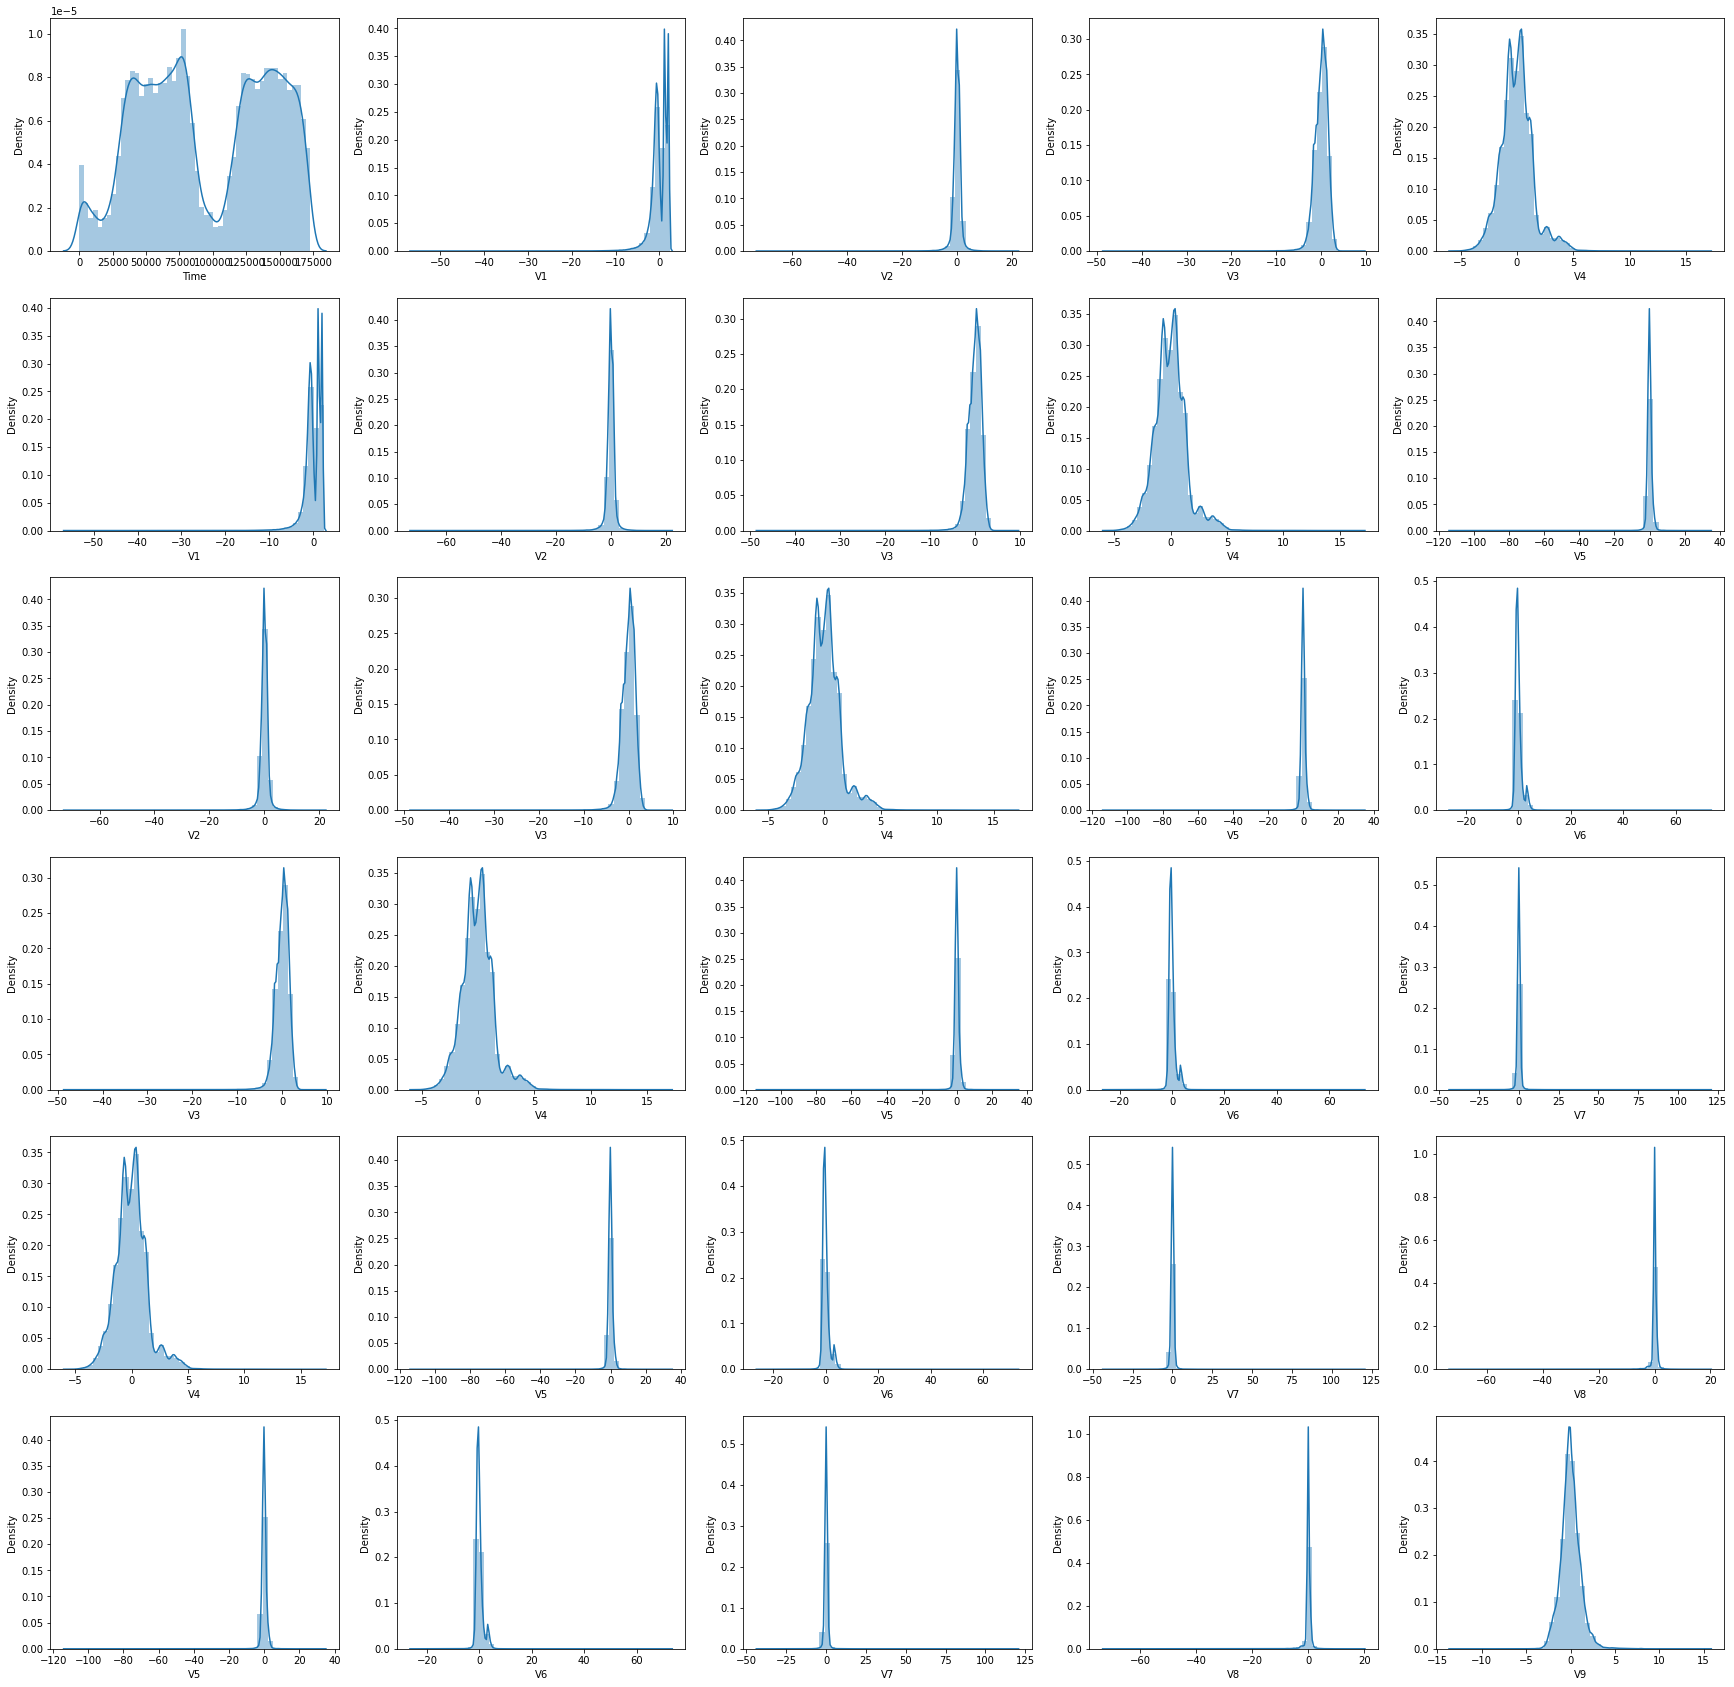

In [176]:
fig, ax=plt.subplots(nrows=6,ncols=5, figsize=[30,30])

for i in range(0,6):
    for j in range(0,5):
        sns.distplot(cc.iloc[:,i+j], ax=ax[i][j])
        
        

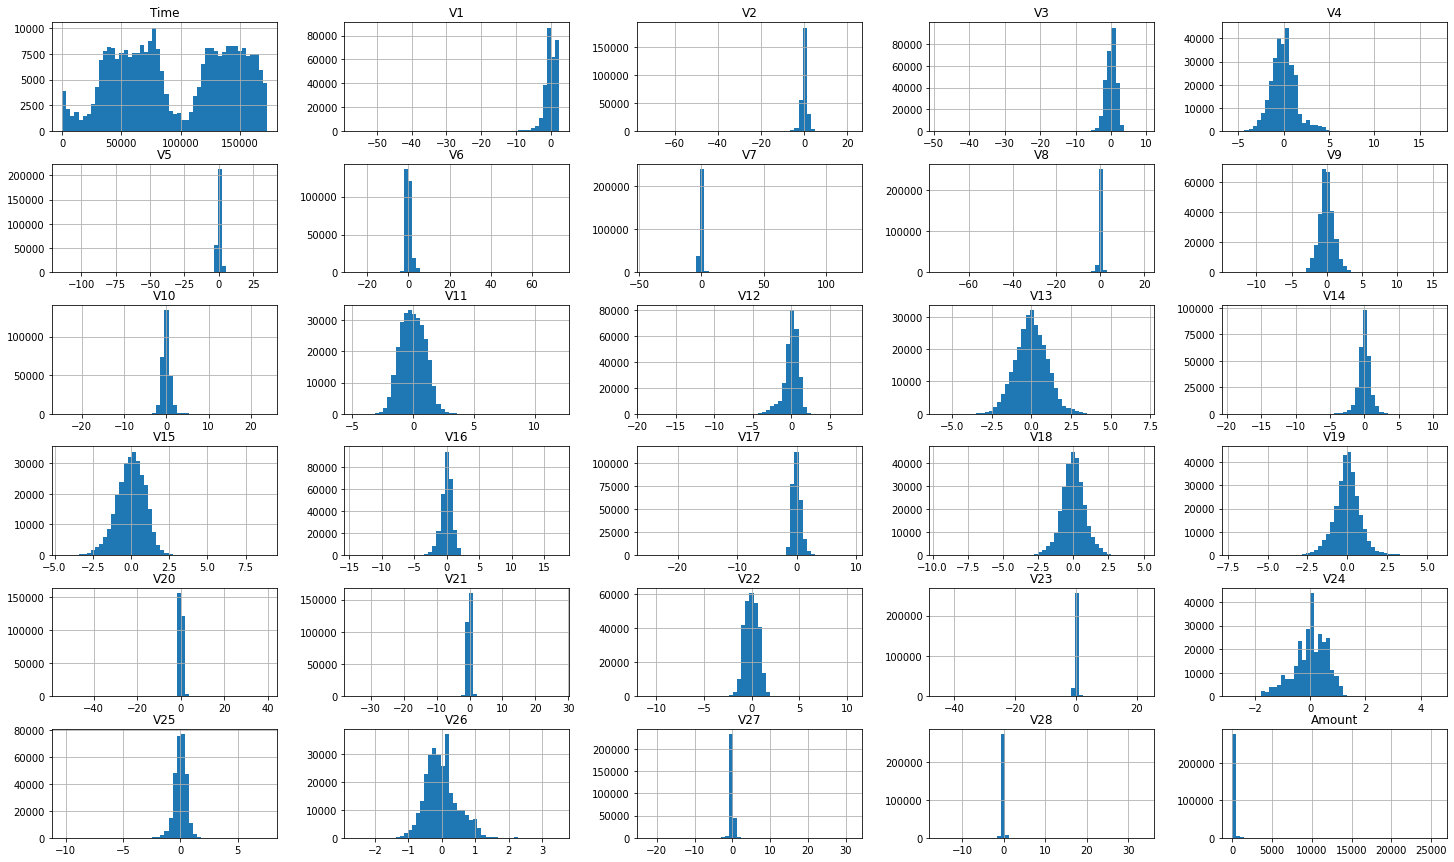

In [177]:
cc.iloc[:,:-1].hist(figsize=[25,15], bins=50);

In [178]:
## Selecting only columns which are of importance when detecting frauds

In [222]:
df=cc[['Time','Amount','Class']]

In [223]:
df

,Time,Amount,Class
0,0.0,149.62,0
1,0.0,2.69,0
2,1.0,378.66,0
3,1.0,123.50,0
4,2.0,69.99,0
...,...,...,...
284802,172786.0,0.77,0
284803,172787.0,24.79,0
284804,172788.0,67.88,0
284805,172788.0,10.00,0


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Amount'}>]], dtype=object)

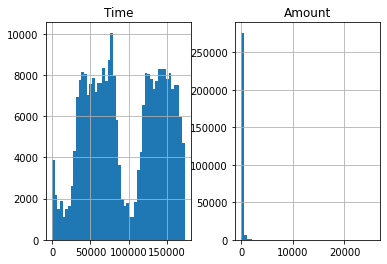

In [224]:
df.hist(bins=50)

In [182]:
## Getting Correlations

<IPython.core.display.Javascript object>

<AxesSubplot:>

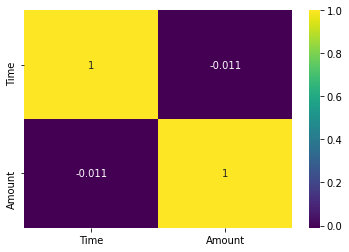

In [225]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [184]:
## Corr among other Attributes:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

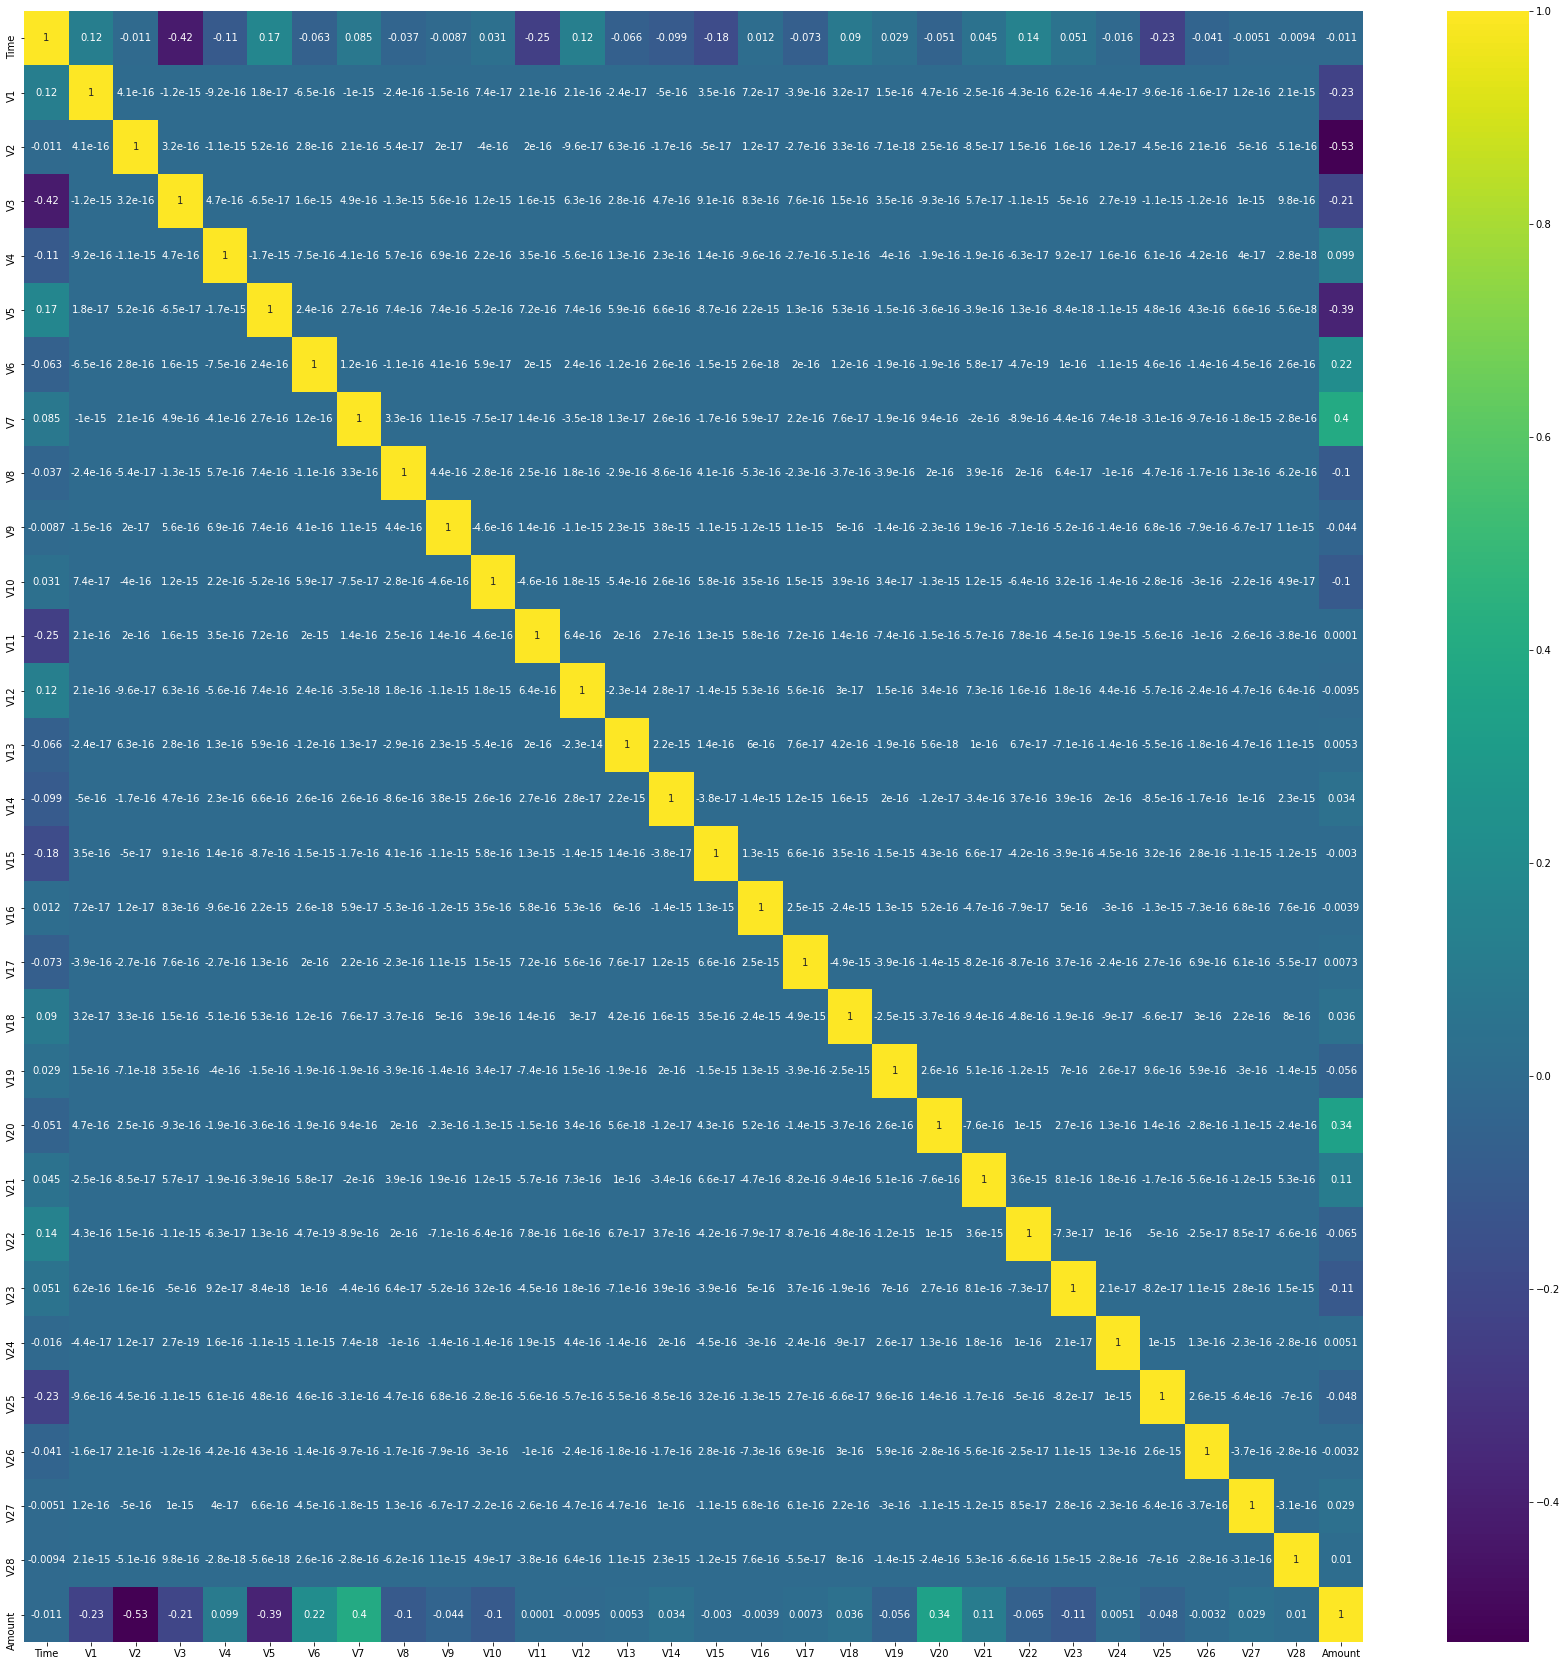

In [226]:
plt.figure(figsize=[30,30])
sns.heatmap(cc.corr(), annot=True, cmap='viridis')

In [227]:
labels=['Fraud','Clear']
fraud=(df['Class']==1).sum()
clear=(df['Class']==0).sum()


In [228]:
print('Total No of Cleared Txns are:',clear)
print('Total No of Fraud Txns are:',fraud)


Total No of Cleared Txns are: 284315
Total No of Fraud Txns are: 492


In [229]:
ff

284807

In [230]:
df['Class'].value_counts()  # confirming the obtained values

0    284315
1       492
Name: Class, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

([<matplotlib.patches.Wedge at 0x14590b67430>,
 [Text(1.0999838009225849, 0.005969732649226358, 'Fraud'),
  Text(-1.0999838004750038, -0.005969815120018522, 'Clear')])

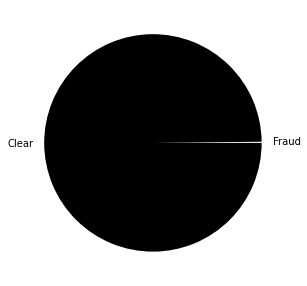

In [231]:
## Plotting a pie chart
plt.figure(figsize=[5,5])
plt.pie([fraud,clear], labels=labels, colors=['White','Black'])

### Using Dummy Classifier to check if there is any need to upsample/downsample data:

In [232]:
from sklearn.dummy import DummyClassifier as DC
# dividing the train and test data
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(cc.iloc[:,:-1], cc.iloc[:,-1],test_size=0.3)

In [192]:
xtrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
269258,163609.0,-0.892230,1.240955,0.864006,-0.980476,0.941851,-0.900280,1.251393,-0.130905,-0.496159,...,-0.137874,-0.313985,-1.033443,-0.236039,0.978491,0.505966,0.172796,-0.190003,0.071368,0.89
133204,80288.0,-1.598463,1.559066,-0.720122,1.051907,-0.412675,-1.004369,0.192708,0.560359,-0.216191,...,-0.382183,0.254704,0.690786,0.270203,0.382932,-0.887267,-0.516098,-0.933959,-0.399342,2.99
69190,53308.0,1.236709,0.180865,0.488985,0.634057,-0.528048,-0.996246,0.049564,-0.184679,0.107453,...,-0.095186,-0.255155,-0.786011,0.130241,0.363866,0.199339,0.094968,-0.034111,0.020198,13.99
257836,158363.0,-0.361159,0.614533,-0.269164,-0.635446,0.522344,-0.595645,1.474299,-0.110351,-0.402191,...,0.130535,0.323199,0.679710,-0.176946,-0.516958,0.565718,-0.086353,-0.042456,0.017557,141.80
126256,77969.0,1.159517,-0.592162,0.860648,-0.872201,-1.141889,-0.075896,-0.888678,0.365928,1.860072,...,-0.274083,0.043879,0.277367,0.004999,-0.012688,0.330159,-0.667488,0.093276,0.017396,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136399,81689.0,-0.261739,1.063994,1.453593,0.029614,0.199507,-0.927554,0.978263,-0.326259,-0.334390,...,0.239158,-0.303947,-0.618529,-0.040333,0.348443,-0.165065,0.041299,0.082692,-0.122914,11.98
23135,32609.0,-1.651922,0.659435,1.744595,0.073128,1.335034,0.050018,0.617849,0.004825,-0.108187,...,-0.013286,-0.201483,0.044458,-0.634281,-0.259379,0.756162,-0.405614,0.238044,-0.090820,13.00
168293,119155.0,2.050416,-0.113276,-1.372664,0.184282,0.084093,-0.840199,0.060758,-0.191712,0.478012,...,-0.257608,0.283814,0.930455,-0.045271,-0.312138,0.248777,-0.099688,-0.023750,-0.072135,1.00
32089,36634.0,0.114973,-0.363116,-0.080230,-2.822533,0.305405,-0.303524,0.573908,-0.398330,-2.573205,...,0.008979,-0.078524,0.375840,-0.062682,-1.029242,-0.566569,-0.388337,0.274701,0.042106,60.00


In [193]:
ytrain

269258    0
133204    0
69190     0
257836    0
126256    0
         ..
136399    0
23135     0
168293    0
32089     0
94288     0
Name: Class, Length: 199364, dtype: category
Categories (2, int64): [0, 1]

In [194]:
xtest

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
117826,74832.0,1.074051,0.016196,0.190494,1.355859,-0.018836,0.050723,0.149517,-0.015427,0.287805,...,-0.047399,-0.087467,-0.143206,-0.161059,-0.258613,0.693770,-0.297371,0.028937,0.023155,68.52
205023,135556.0,2.062508,-0.011176,-1.407693,0.133277,0.291272,-0.715754,0.156949,-0.265036,0.266599,...,-0.158544,0.290396,1.021794,-0.082219,-0.428653,0.319294,-0.094903,-0.014364,-0.070571,1.00
100596,67562.0,-1.040777,0.033330,2.874954,-1.577354,-1.200074,0.847332,-1.082061,-0.265158,-0.056184,...,0.043684,0.934107,0.596226,-0.357370,0.065686,0.591438,-0.104305,0.381461,0.123958,0.80
197398,131998.0,-6.271415,5.251633,-3.048317,-1.606459,-1.064303,-0.869940,-0.079936,-1.106210,3.956877,...,1.686823,1.239042,0.764096,0.301353,-0.057705,-0.121401,-0.507829,-0.995341,-1.505783,9.99
261672,160134.0,-1.092756,1.703509,-0.910083,-0.281470,0.300890,-1.474186,0.740424,0.132657,0.211826,...,0.122635,0.265567,1.015627,-0.110582,-0.028741,-0.296915,-0.143828,0.428874,0.391142,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162705,115306.0,-0.153698,0.979063,0.105306,1.043781,0.266556,-0.613591,0.612625,-0.332235,-0.215720,...,0.187021,-0.153355,-0.083785,0.361258,-0.041913,-1.408261,0.474490,0.144080,0.288360,1.29
193838,130316.0,-0.682316,1.159830,-1.467692,-0.756148,1.941803,-1.150511,1.867152,-0.786437,0.537324,...,0.159328,-0.058745,0.628630,-0.026652,0.361128,-0.509900,0.456740,0.047546,0.047626,4.00
223620,143456.0,-0.475398,1.470356,-1.790567,0.251788,0.873751,-1.176337,-0.278268,-2.917684,0.000266,...,0.320298,-1.091919,1.056529,0.278251,-0.353607,-0.361362,-0.170235,-0.185450,0.085683,1.00
213576,139309.0,-1.764110,2.042562,-3.317093,-0.499526,1.217073,1.292592,-0.213723,-4.449180,0.241343,...,-1.698376,5.042025,0.506745,0.918619,-0.590440,-1.030150,-0.265612,0.809323,0.251836,86.00


In [195]:
ytest

117826    0
205023    0
100596    0
197398    0
261672    0
         ..
162705    0
193838    0
223620    0
213576    0
190686    0
Name: Class, Length: 85443, dtype: category
Categories (2, int64): [0, 1]

In [235]:
from scipy.stats import zscore as zs
dc=DC(strategy='most_frequent')
xx=xtrain.apply(zs)
dc.fit(xx,ytrain)
xxx=xtest.apply(zs)
ypred=dc.predict(xxx)
print('Score of prediction is ',dc.score(xxx,ypred))
print('Unique values in ypred are',np.unique(ypred))

Score of prediction is  1.0


<IPython.core.display.Javascript object>

Unique values in ypred are [0]


In [236]:
(ypred==1).sum()

0

In [237]:
np.unique(ypred)

<IPython.core.display.Javascript object>

array([0], dtype=int64)

##### There is just no 1 prediction given by the dummy classifier, then why would it, if it does, that's not normal

## Now Upsampling the minority data so that the over-representation of Majority is subdued

In [199]:
from sklearn.utils import resample  ## Will resample for both the test as well as train dataset as there is over representation of class==0.

In [456]:

from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(cc.iloc[:,:-1], cc.iloc[:,-1],test_size=0.3)

train=pd.concat([xtrain,ytrain], axis=1)

<IPython.core.display.Javascript object>

In [457]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
172839,121259.0,2.160669,-1.477905,-1.805383,-1.635567,-0.778991,-1.083693,-0.393155,-0.461362,-1.682435,...,-0.287263,-0.683169,0.109048,-0.698976,-0.135163,-0.284161,-0.046855,-0.043981,133.00,0
214943,139880.0,-0.910481,0.139996,0.984318,-3.167317,-0.717540,-0.450638,-0.341933,0.451665,-2.611953,...,-0.156965,-0.094077,-0.430374,-0.382469,0.810173,-0.098989,0.135905,0.028007,1.00,0
10519,17320.0,0.387981,-1.563740,-0.564541,-0.903375,-0.457661,-0.030189,0.440727,-0.140649,2.165918,...,0.172636,0.067452,-0.481031,-0.229787,0.455595,0.107857,-0.094286,0.052625,430.68,0
60900,49555.0,-1.240548,0.708495,-0.185540,1.284093,-2.087227,1.915071,2.630211,0.172160,-0.472274,...,-0.068717,0.101869,0.233482,-0.750561,0.118002,-0.170532,0.394581,-0.008006,576.58,0
132011,79819.0,1.264823,1.299790,-1.945727,1.391301,1.515953,-0.859227,0.744175,-0.247834,-0.535377,...,-0.227302,-0.468143,-0.293630,-1.065731,0.928562,-0.215630,0.061543,0.087022,0.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253264,156168.0,1.915130,-1.243727,-0.628234,-0.457546,-1.044236,-0.008211,-0.957489,0.093399,-0.191862,...,-0.161618,-0.115490,0.228760,0.765257,-0.473137,0.567656,-0.043809,-0.034997,98.00,0
241733,151158.0,1.487526,-0.870537,-0.670934,1.391896,-0.442590,0.040260,-0.123057,-0.088329,0.714294,...,0.376691,0.679242,-0.077052,0.687128,-0.112151,-0.621036,0.010736,0.022519,260.00,0
277767,167844.0,-1.159398,-0.317536,0.367101,-0.400824,1.380710,-1.395277,1.242776,-0.729063,0.492451,...,-0.546816,-0.325125,0.950323,-0.004205,-0.226108,0.132726,0.167090,-0.440067,8.99,0
275110,166374.0,-0.124686,0.932161,0.585166,-0.697290,0.611064,-1.021995,1.186910,-0.291114,-0.385417,...,-0.175630,-0.410679,-0.006464,-0.006121,-0.686460,0.098042,0.120108,0.181333,1.79,0


In [458]:
(train['Class']==1).sum()

334

In [459]:
(train['Class']==0).sum()

199030

In [464]:
np.sum(ytest==1)

<IPython.core.display.Javascript object>

158

In [414]:
n_samples1=train[(train['Class']==0)].shape
n_samples1

(199028, 31)

In [416]:

xx=train[(train['Class']==1)]
clear=train[train['Class']==0]
clear

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
203267,134743.0,-1.348051,-0.356164,0.667141,1.578275,-1.468900,0.848097,1.560293,0.342269,-0.196221,...,0.102539,-0.310560,1.199319,-0.073781,-0.540541,-0.890326,0.011731,0.163099,470.10,0
182872,125575.0,0.686608,-3.156147,-2.974098,-0.217082,-0.981315,-1.496111,1.277268,-0.762119,-0.898537,...,0.835277,0.519821,-0.767586,0.062154,0.095218,-0.000437,-0.237658,0.058261,830.00,0
51766,45109.0,1.294129,0.083854,-0.166900,-0.026111,-0.139272,-1.013574,0.304445,-0.261077,0.038694,...,-0.471043,-1.482442,0.128494,-0.144330,0.147623,0.654530,-0.109170,0.001269,29.99,0
144374,86072.0,-1.222208,-1.079052,-1.188102,2.478048,1.472813,4.807976,-0.552632,-1.879795,-1.844786,...,-1.076483,-0.867124,-0.590150,1.002750,0.460010,0.042277,-0.041296,0.359816,705.35,0
249538,154455.0,-0.401869,0.356317,1.789809,-0.454236,-0.489068,-0.632792,0.188577,0.122497,0.562286,...,0.264648,0.814794,-0.131043,0.415279,-0.514497,0.517468,0.117897,0.159674,11.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204624,135367.0,2.038008,-0.151362,-1.452960,0.180863,0.116789,-0.795600,0.069085,-0.155467,0.512710,...,0.271357,0.865799,-0.037150,-0.386025,0.231019,-0.099537,-0.028005,-0.074312,4.99,0
98676,66762.0,1.141163,-0.014348,0.633262,1.334864,-0.469788,-0.031061,-0.240470,0.127396,0.760940,...,-0.061923,0.049332,-0.065615,0.075632,0.599189,-0.282000,0.050299,0.018264,11.50,0
80502,58514.0,1.292084,-1.263680,0.618125,-1.258050,-1.734644,-0.852623,-0.865935,-0.259925,-1.901476,...,-0.291419,-0.687860,0.071759,0.372425,0.124689,-0.425343,0.028814,0.051029,122.38,0
55826,47141.0,1.405032,-0.356611,0.597648,-0.674562,-1.029068,-1.027816,-0.471893,-0.257468,-0.937109,...,-0.082282,-0.308998,0.121322,0.388135,0.265104,-0.484764,0.016963,0.025128,9.99,0


In [379]:
fraud_upsampled=resample(xx,replace=True,n_samples=len(clear),random_state=123)

In [380]:
fraud_upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1
17453,28726.0,-29.876366,16.434525,-30.558697,6.505862,-21.665654,-4.940356,-20.081391,19.587773,-3.591491,...,1.812954,-2.232252,-1.412803,0.178731,2.156042,-0.209385,1.255649,0.364530,99.99,1
112840,72824.0,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,...,0.862913,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,45.03,1
8312,11092.0,0.378275,3.914797,-5.726872,6.094141,1.698875,-2.807314,-0.591118,-0.123496,-2.530713,...,0.149896,-0.601967,-0.613724,-0.403114,1.568445,0.521884,0.527938,0.411910,1.00,1
150663,93853.0,-5.839192,7.151532,-12.816760,7.031115,-9.651272,-2.938427,-11.543207,4.843627,-3.494276,...,2.462056,1.054865,0.530481,0.472670,-0.275998,0.282435,0.104886,0.254417,316.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192382,129668.0,0.753356,2.284988,-5.164492,3.831112,-0.073622,-1.316596,-1.855495,0.831079,-1.567514,...,0.382007,0.033958,0.187697,0.358433,-0.488934,-0.258802,0.296145,-0.047174,2.00,1
152019,96717.0,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,...,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,1.00,1
163149,115691.0,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,-0.978626,...,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,17.06,1
151519,95628.0,-17.518909,12.572118,-19.038538,11.190895,-13.554721,-0.411924,-23.189397,-5.301412,-8.630390,...,-4.969478,0.976125,1.841248,0.334418,-0.720128,-0.232603,-3.021992,-0.478158,1.63,1


In [251]:
# Now concating the two dataframes together to get a new dataset on which the model is to be built:

In [420]:
train=pd.concat([clear,fraud_upsampled])
(train.isnull()).sum()


<IPython.core.display.Javascript object>

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [421]:
train['Class'].value_counts()

0    199028
1    199007
Name: Class, dtype: int64

In [261]:
## Now that the data is balanced, we can use proper ML algorithms to make the classifications

In [422]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
xtrain=train.iloc[:,:-1]
ytrain=train.iloc[:,-1]

lr.fit(xtrain,ytrain)


LogisticRegression(solver='liblinear')

In [423]:
lr.score(xtest,ytest)

0.9700033940755826

In [424]:
lr.score(xtrain,ytrain)

0.9435049681560667

In [268]:
## Gives quite a balanced result, but let's try after normalizing the data:


In [465]:
test=pd.concat([xtest,ytest], axis=1)

<IPython.core.display.Javascript object>

In [437]:
from scipy.stats import zscore as zs
lr.fit(xtrain.apply(zs),ytrain)



<IPython.core.display.Javascript object>

In [466]:
test['Class'].value_counts()

0    85285
1      158
Name: Class, dtype: int64

In [467]:
yy=test[test['Class']==1]
yy

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
245556,152802.0,1.322724,-0.843911,-2.096888,0.759759,-0.196377,-1.166353,0.482534,-0.349791,1.045007,...,0.133815,-0.121562,-0.208574,-0.254752,-0.098324,-0.613874,0.002654,0.072386,357.95,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
12070,20931.0,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.00,1
154371,101313.0,-25.825982,19.167239,-25.390229,11.125435,-16.682644,3.933699,-37.060311,-28.759799,-11.126624,...,-16.922016,5.703684,3.510019,0.054330,-0.671983,-0.209431,-4.950022,-0.448413,2.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42887,41285.0,-12.835760,6.574615,-12.788462,8.786257,-10.723121,-2.813536,-14.248847,7.960521,-7.718751,...,2.679490,-0.047335,-0.836982,0.625349,0.125865,0.177624,-0.817680,-0.521030,37.32,1
272521,165132.0,-7.503926,-0.360628,-3.830952,2.486103,2.497367,1.332437,-6.783964,-15.415385,0.465512,...,-6.389132,2.249964,1.670508,0.140450,0.162147,1.207731,1.268958,0.097538,12.31,1
14338,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,3.76,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [468]:
aa=resample(yy,n_samples=85285, replace=True, random_state=123)

In [469]:
aa

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
8296,11080.0,-2.125490,5.973556,-11.034727,9.007147,-1.689451,-2.854415,-7.810441,2.030870,-5.902828,...,1.646518,-0.278485,-0.664841,-1.164555,1.701796,0.690806,2.119749,1.108933,1.00,1
150666,93860.0,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1
50537,44532.0,-0.234922,0.355413,1.972183,-1.255593,-0.681387,-0.665732,0.059110,-0.003153,1.122451,...,0.220670,0.912107,-0.286338,0.451208,0.188315,-0.531846,0.123185,0.039581,1.00,1
27738,34684.0,-2.439237,2.591458,-2.840126,1.286244,-1.777016,-1.436139,-2.206056,-2.282725,-0.292885,...,1.774460,-0.771390,0.065727,0.103916,-0.057578,0.242652,-0.268649,-0.743713,125.30,1
154676,102542.0,-1.456876,3.740306,-7.404518,7.440964,-1.549878,-1.661697,-5.757213,1.615011,-2.194881,...,0.957897,0.145339,-0.044704,-0.544962,-0.757757,-0.005352,0.318152,-0.323554,2.28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,9064.0,-3.499108,0.258555,-4.489558,4.853894,-6.974522,3.628382,5.431271,-1.946734,-0.775680,...,-1.052368,0.204817,-2.119007,0.170279,-0.393844,0.296367,1.985913,-0.900452,1809.68,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
14338,25426.0,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,-1.143343,...,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,3.76,1
147605,88737.0,1.917827,0.951967,-2.059206,3.833998,1.668192,0.769826,0.232463,0.107941,-1.143646,...,0.015255,0.239994,-0.111916,-0.380576,0.370995,0.189117,-0.005823,-0.012105,9.21,1


In [470]:
test=pd.concat([aa, test[test['Class']==0]], axis=0)
xtest=test.iloc[:,:-1]
ytest=test.iloc[:,-1]
                
lr.score(xtrain.apply(zs),ytrain)
xtest=xtest.apply(zs)
lr.score(xtest,ytest)

<IPython.core.display.Javascript object>

0.9356100134842

In [471]:
## Gives a similar result

In [475]:
## Checking for overfit/underfitting of data:

lr.score(xtrain.apply(zs),ytrain)

0.11494051082442167

In [476]:
## This is the result of duplication of data, Underfitting can be observed
## Getting ypred:

In [477]:
ypred=lr.predict(xtest.apply(zs))

In [478]:
ypred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [479]:
## Making a claasification report to get precision, recall and f1-score


In [480]:
from sklearn.metrics import classification_report as cvs

print('Logistic Regression classification_report')

print('...'*10)

print(cvs(ytest,ypred))

Logistic Regression classification_report
..............................
              precision    recall  f1-score   support

           0       0.92      0.95      0.94     85285
           1       0.95      0.92      0.93     85285

    accuracy                           0.94    170570
   macro avg       0.94      0.94      0.94    170570
weighted avg       0.94      0.94      0.94    170570



In [481]:
## Precision =TP/(TP+FP)
## Recall= TP/(TP+FN)


In [482]:
## Making confusion matrix now

In [483]:
from sklearn.metrics import confusion_matrix as cm
cm1=cm(ytest,ypred)

In [484]:
cm1

array([[81313,  3972],
       [ 7011, 78274]], dtype=int64)

In [485]:
ytest.value_counts()

0    85285
1    85285
Name: Class, dtype: int64

In [486]:
## Making a heatmap with above Confusion matirx:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

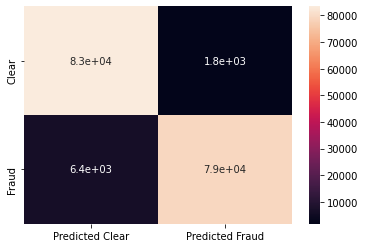

In [308]:
sns.heatmap(pd.DataFrame(cm1, index=['Clear','Fraud'], columns=['Predicted Clear', 'Predicted Fraud']), annot=True)

In [487]:
## Getting Type 1 and Type 2 errors assuming the prediction as Clear Txn being the Null Hypothesis and the event that 
## It gets prdicted as Fraud is the origin of the Type 1 error as it indicates the producer's risk

In [488]:
type1_err=cm1[0][1]/(cm1[0][1]+cm1[0][0])

In [489]:
type1_err

0.04657325438236501

In [490]:
type2_err=cm1[1][0]/(cm1[1][0]+cm1[1][1])

In [491]:
type2_err

0.08220671864923491

In [492]:
Accuracy=1-(cm1[0][1]+cm1[1][0])/(cm1[0][1]+cm1[1][0]+cm1[0][0]+cm1[1][1])

In [493]:
Accuracy

0.9356100134842

In [319]:
## We can confirm the true value from above calculations

### **We can use SMOTE Technique to avoid data imbalance by creating new synthetic datapoints so that we don't have to undersample the minority data to avoid any useful information loss or oversample the minority class and get the overfitted model** 

In [494]:
pip install imblearn

Error processing line 1 of C:\Users\Asus\anaconda31\lib\site-packages\matplotlib-3.4.2-py3.8-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\Asus\anaconda31\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 553, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


In [505]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(cc.iloc[:,:-1], cc.iloc[:,-1],test_size=0.3)

sm = SMOTE(random_state=27)
x_train1, y_train1 = sm.fit_resample(xtrain, ytrain)

In [506]:
lr2=lr.fit(x_train1, y_train1)

In [509]:
ypred=lr2.predict(xtest)

In [508]:
lr2.score(xtest,ytest)

0.9870205868239645

In [510]:
lr2.score(xtrain,ytrain)

0.9861158483979053

In [511]:
lr2=lr.fit(x_train1.apply(zs), y_train1)

In [512]:
lr2.score(x_train1.apply(zs), y_train1)

0.9840895387398252

In [515]:
lr2.score(xtest.apply(zs), ytest)

0.044977353323268146

In [516]:
### With standarization, oversampled models perform poorly

In [517]:
cm1=cm(ytest,ypred)

In [518]:
cm1

array([[84206,  1089],
       [   20,   128]], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

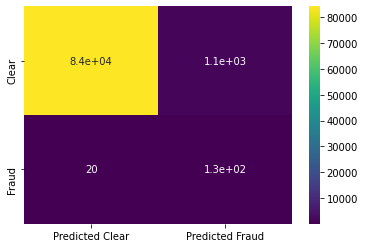

In [520]:
sns.heatmap(pd.DataFrame(cm1, index=['Clear','Fraud'], columns=['Predicted Clear', 'Predicted Fraud']),cmap='viridis', annot=True)

In [490]:
type2_err=cm1[1][0]/(cm1[1][0]+cm1[1][1])

In [491]:
type2_err

0.08220671864923491

In [492]:
Accuracy=1-(cm1[0][1]+cm1[1][0])/(cm1[0][1]+cm1[1][0]+cm1[0][0]+cm1[1][1])

In [493]:
Accuracy

0.9356100134842